<a href="https://www.kaggle.com/code/lalit7881/ml-model-accuracy-decision-tree-tops-at-100?scriptVersionId=293418630" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-success-factors-dataset-100k/kaggle_success_factors.csv


## Kaggle Success Factors Dataset (100K Records)

## Description (Detailed):
The Kaggle Success Factors Dataset (100K) is a large-scale dataset designed to analyze patterns, trends, and factors that influence success on Kaggle competitions and projects. With over 100,000 records, the dataset provides rich insights into user performance, competition behavior, participation frequency, ranking outcomes, and engagement metrics.

This dataset can be used to study how experience level, activity patterns, team collaboration, submission frequency, problem domain, and learning consistency impact success rates on Kaggle. It is ideal for building predictive models, ranking analysis systems, recommendation engines, and performance forecasting tools.

Researchers, data scientists, and machine learning enthusiasts can leverage this dataset to:

Identify key predictors of Kaggle competition success

Analyze behavioral patterns of high-performing Kaggle users

Build machine learning models to predict leaderboard performance

Understand engagement trends and participation strategies

Develop data-driven insights for improving competitive learning

Overall, the dataset serves as a powerful resource for exploring competitive data science dynamics, performance optimization, and success modeling in online ML communities.

## Import dataset

In [2]:
file_path = "/kaggle/input/kaggle-success-factors-dataset-100k/kaggle_success_factors.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()


,content_id,content_type,title,author_username,author_tier,author_followers,author_notebooks_count,author_datasets_count,primary_topic,all_topics,...,uses_gpu,file_size_mb,usability_score,file_format,column_count,row_count,license_type,engagement_rate,virality_score,quality_score
0,nb_84b5df36,notebook,Natural Language Processing: A Comprehensive G...,learn_dev,Master,1451,35,26,Natural Language Processing,Natural Language Processing,...,True,1.49,NaN,NaN,NaN,NaN,NaN,5.04,4.7,46.0
1,ds_87737bae,dataset,Complete Forecasting Data,johndev390,Expert,935,18,3,Forecasting,Forecasting,...,NaN,166.38,1.8,Images,21.0,130026.0,CC BY,0.00,0.0,13.3
2,nb_d3412e7c,notebook,EDA + Feature Engineering: Recommendation Systems,vizpro,Contributor,438,13,2,Recommendation Systems,Recommendation Systems|Data Visualization|Name...,...,False,6.71,NaN,NaN,NaN,NaN,NaN,0.72,0.0,15.4
3,ds_fdc3c6b4,dataset,Data Visualization Time Series,samscientist2020,Novice,102,3,0,Data Visualization,Data Visualization|Text Classification|Transpo...,...,NaN,8.66,5.5,JSON,4.0,365096.0,Other,0.00,0.0,11.5
4,nb_86a85784,notebook,Understanding Stock Market with Python,kaggleexpert,Novice,97,1,0,Stock Market,Stock Market|LightGBM,...,False,3.00,NaN,NaN,NaN,NaN,NaN,1.42,0.1,12.5


In [4]:
df.shape


(100000, 40)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   content_id              100000 non-null  object 
 1   content_type            100000 non-null  object 
 2   title                   100000 non-null  object 
 3   author_username         100000 non-null  object 
 4   author_tier             100000 non-null  object 
 5   author_followers        100000 non-null  int64  
 6   author_notebooks_count  100000 non-null  int64  
 7   author_datasets_count   100000 non-null  int64  
 8   primary_topic           100000 non-null  object 
 9   all_topics              100000 non-null  object 
 10  programming_language    100000 non-null  object 
 11  is_competition_related  100000 non-null  bool   
 12  created_date            100000 non-null  object 
 13  last_updated            100000 non-null  object 
 14  days_since_creation  

In [6]:
df.columns


Index(['content_id', 'content_type', 'title', 'author_username', 'author_tier',
       'author_followers', 'author_notebooks_count', 'author_datasets_count',
       'primary_topic', 'all_topics', 'programming_language',
       'is_competition_related', 'created_date', 'last_updated',
       'days_since_creation', 'update_count', 'views', 'upvotes',
       'comments_count', 'fork_count', 'downloads', 'notebook_usage', 'medal',
       'is_featured', 'is_trending', 'execution_time_seconds', 'code_lines',
       'markdown_ratio', 'visualization_count', 'libraries_used', 'uses_gpu',
       'file_size_mb', 'usability_score', 'file_format', 'column_count',
       'row_count', 'license_type', 'engagement_rate', 'virality_score',
       'quality_score'],
      dtype='object')

## Check Missing Values

In [7]:
df.isnull().sum()

content_id                    0
content_type                  0
title                         0
author_username               0
author_tier                   0
author_followers              0
author_notebooks_count        0
author_datasets_count         0
primary_topic                 0
all_topics                    0
programming_language          0
is_competition_related        0
created_date                  0
last_updated                  0
days_since_creation           0
update_count                  0
views                         0
upvotes                       0
comments_count                0
fork_count                    0
downloads                     0
notebook_usage                0
medal                     92045
is_featured                   0
is_trending                   0
execution_time_seconds    30296
code_lines                30296
markdown_ratio            30296
visualization_count       30296
libraries_used            30296
uses_gpu                  30296
file_siz

In [8]:
df.isnull().mean() * 100

content_id                 0.000
content_type               0.000
title                      0.000
author_username            0.000
author_tier                0.000
author_followers           0.000
author_notebooks_count     0.000
author_datasets_count      0.000
primary_topic              0.000
all_topics                 0.000
programming_language       0.000
is_competition_related     0.000
created_date               0.000
last_updated               0.000
days_since_creation        0.000
update_count               0.000
views                      0.000
upvotes                    0.000
comments_count             0.000
fork_count                 0.000
downloads                  0.000
notebook_usage             0.000
medal                     92.045
is_featured                0.000
is_trending                0.000
execution_time_seconds    30.296
code_lines                30.296
markdown_ratio            30.296
visualization_count       30.296
libraries_used            30.296
uses_gpu  

In [9]:
df.describe()

,author_followers,author_notebooks_count,author_datasets_count,days_since_creation,update_count,views,upvotes,comments_count,fork_count,downloads,...,code_lines,markdown_ratio,visualization_count,file_size_mb,usability_score,column_count,row_count,engagement_rate,virality_score,quality_score
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,...,69704.000000,69704.000000,69704.000000,100000.000000,30296.000000,30296.000000,3.029600e+04,100000.000000,100000.000000,100000.000000
mean,385.12369,12.348570,4.649760,1279.687560,40.125310,3.682308e+03,25.263640,2.694080,17.189160,97.705870,...,203.931496,0.424910,2.863351,49.560173,5.335846,19.475244,1.618224e+05,3.627720,1.223701,28.608314
std,1101.29717,21.723412,8.712344,738.878265,70.455739,1.773623e+04,171.033047,21.976784,151.115528,1584.860146,...,192.647313,0.165471,2.332003,468.287404,2.272963,24.955557,1.170996e+06,5.667521,6.218154,16.011015
min,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000e+01,0.000000,0.000000,0.000000,0.000000,...,20.000000,0.100000,0.000000,0.010000,1.000000,2.000000,1.000000e+02,0.000000,0.000000,0.000000
25%,59.00000,3.000000,1.000000,640.000000,0.000000,1.490000e+02,0.000000,0.000000,0.000000,0.000000,...,86.000000,0.298000,1.000000,1.660000,3.600000,6.000000,5.676750e+03,0.000000,0.000000,16.100000
50%,142.00000,7.000000,2.000000,1280.000000,10.000000,5.750000e+02,1.000000,0.000000,0.000000,0.000000,...,148.000000,0.423000,2.000000,3.770000,5.500000,12.000000,2.213650e+04,1.250000,0.100000,26.400000
75%,354.00000,13.000000,5.000000,1922.000000,40.000000,2.133000e+03,8.000000,0.000000,3.000000,1.000000,...,254.000000,0.554000,4.000000,10.590000,7.200000,24.000000,8.591875e+04,5.080000,0.400000,38.900000
max,105191.00000,842.000000,388.000000,2556.000000,365.000000,1.919355e+06,12068.000000,1570.000000,19109.000000,274712.000000,...,6267.000000,0.700000,18.000000,42102.280000,10.000000,500.000000,1.000000e+08,77.140000,100.000000,92.100000


In [10]:
df.describe(include="object")

,content_id,content_type,title,author_username,author_tier,primary_topic,all_topics,programming_language,created_date,last_updated,medal,libraries_used,uses_gpu,file_format,license_type
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,7955,69704,69704,30296,30296
unique,100000,2,1000,15942,5,50,61366,4,2557,2557,3,68646,2,7,9
top,nb_e43436fe,notebook,Beginner's Guide to Titanic,learn_hunter,Novice,PyTorch,Finance,Python,2019-09-25,2025-12-25,Bronze,eli5|pytorch|sklearn,False,CSV,CC0
freq,1,69704,157,184,49974,2069,441,84807,62,3288,6832,5,52246,4418,3453


## Data Type Optimization

In [11]:
df.select_dtypes(include=["int64", "float64"]).columns

Index(['author_followers', 'author_notebooks_count', 'author_datasets_count',
       'days_since_creation', 'update_count', 'views', 'upvotes',
       'comments_count', 'fork_count', 'downloads', 'notebook_usage',
       'execution_time_seconds', 'code_lines', 'markdown_ratio',
       'visualization_count', 'file_size_mb', 'usability_score',
       'column_count', 'row_count', 'engagement_rate', 'virality_score',
       'quality_score'],
      dtype='object')

In [12]:
df.select_dtypes(include=["object"]).columns


Index(['content_id', 'content_type', 'title', 'author_username', 'author_tier',
       'primary_topic', 'all_topics', 'programming_language', 'created_date',
       'last_updated', 'medal', 'libraries_used', 'uses_gpu', 'file_format',
       'license_type'],
      dtype='object')

In [13]:
for col in df.select_dtypes(include="object"):
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts().head())



content_id Value Counts:
content_id
nb_e43436fe    1
ds_0cd0bda5    1
ds_9dc50da0    1
nb_0a24c5a5    1
ds_07896281    1
Name: count, dtype: int64

content_type Value Counts:
content_type
notebook    69704
dataset     30296
Name: count, dtype: int64

title Value Counts:
title
Beginner's Guide to Titanic                  157
Computer Vision - From Zero to Hero          151
Data Visualization: A Comprehensive Guide    147
Understanding Customer Churn with Python     147
🔥 Finance - Gold Medal Solution              143
Name: count, dtype: int64

author_username Value Counts:
author_username
learn_hunter        184
ml_expert           181
analytics_expert    179
analytics_pro       177
model_analyst       175
Name: count, dtype: int64

author_tier Value Counts:
author_tier
Novice         49974
Contributor    30059
Expert         14910
Master          4045
Grandmaster     1012
Name: count, dtype: int64

primary_topic Value Counts:
primary_topic
PyTorch                   2069
Recommendation

## Duplicate Records Check

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df = df.drop_duplicates()

## Correlation Analysis (Numerical)

In [16]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,author_followers,author_notebooks_count,author_datasets_count,is_competition_related,days_since_creation,update_count,views,upvotes,comments_count,fork_count,...,code_lines,markdown_ratio,visualization_count,file_size_mb,usability_score,column_count,row_count,engagement_rate,virality_score,quality_score
author_followers,1.000000,0.238771,0.233741,0.005040,0.001699,-0.003893,0.060075,0.038494,0.032273,0.031659,...,-0.000678,-0.005724,-0.003642,-0.000785,-0.000618,0.003114,0.001407,0.014636,0.050339,-0.006850
author_notebooks_count,0.238771,1.000000,0.377734,0.002769,-0.001934,0.000420,0.123159,0.087028,0.081264,0.076710,...,0.003180,-0.007357,-0.004311,-0.002770,0.004553,-0.003068,0.007831,0.029988,0.089458,-0.001986
author_datasets_count,0.233741,0.377734,1.000000,-0.000630,0.002382,-0.004749,0.113336,0.077275,0.070343,0.071917,...,-0.001148,0.002784,-0.005203,-0.003344,0.001340,0.001621,0.000271,0.026231,0.087115,-0.004900
is_competition_related,0.005040,0.002769,-0.000630,1.000000,-0.001552,-0.004900,0.092097,0.059159,0.051051,0.048616,...,0.003306,0.002419,0.007385,-0.000172,-0.005209,-0.011016,-0.001589,0.047024,0.079885,0.005721
days_since_creation,0.001699,-0.001934,0.002382,-0.001552,1.000000,0.332701,0.067234,0.048044,0.039808,0.038311,...,0.006627,0.001205,0.001039,0.001851,-0.006630,0.002868,0.000569,0.042439,-0.108845,-0.000079
update_count,-0.003893,0.000420,-0.004749,-0.004900,0.332701,1.000000,0.017807,0.015098,0.015357,0.007752,...,-0.002521,0.001503,0.002904,0.003855,-0.018598,-0.002945,0.001214,0.020059,-0.037018,0.002632
views,0.060075,0.123159,0.113336,0.092097,0.067234,0.017807,1.000000,0.751743,0.652209,0.621450,...,0.003303,-0.004597,0.118138,0.001227,0.047704,0.000226,-0.000917,0.145238,0.523000,0.158596
upvotes,0.038494,0.087028,0.077275,0.059159,0.048044,0.015098,0.751743,1.000000,0.865593,0.598777,...,-0.000323,-0.002404,0.138401,0.002216,0.056261,0.001016,-0.001697,0.279655,0.538873,0.191352
comments_count,0.032273,0.081264,0.070343,0.051051,0.039808,0.015357,0.652209,0.865593,1.000000,0.500092,...,-0.001463,-0.005274,0.121173,0.007717,0.048072,-0.000557,-0.003411,0.263479,0.490506,0.165628
fork_count,0.031659,0.076710,0.071917,0.048616,0.038311,0.007752,0.621450,0.598777,0.500092,1.000000,...,0.004878,-0.002631,0.122648,-0.010974,NaN,NaN,NaN,0.132071,0.393097,0.151904


array([[<Axes: title={'center': 'author_followers'}>,
        <Axes: title={'center': 'author_notebooks_count'}>,
        <Axes: title={'center': 'author_datasets_count'}>,
        <Axes: title={'center': 'days_since_creation'}>,
        <Axes: title={'center': 'update_count'}>],
       [<Axes: title={'center': 'views'}>,
        <Axes: title={'center': 'upvotes'}>,
        <Axes: title={'center': 'comments_count'}>,
        <Axes: title={'center': 'fork_count'}>,
        <Axes: title={'center': 'downloads'}>],
       [<Axes: title={'center': 'notebook_usage'}>,
        <Axes: title={'center': 'execution_time_seconds'}>,
        <Axes: title={'center': 'code_lines'}>,
        <Axes: title={'center': 'markdown_ratio'}>,
        <Axes: title={'center': 'visualization_count'}>],
       [<Axes: title={'center': 'file_size_mb'}>,
        <Axes: title={'center': 'usability_score'}>,
        <Axes: title={'center': 'column_count'}>,
        <Axes: title={'center': 'row_count'}>,
        <Axes

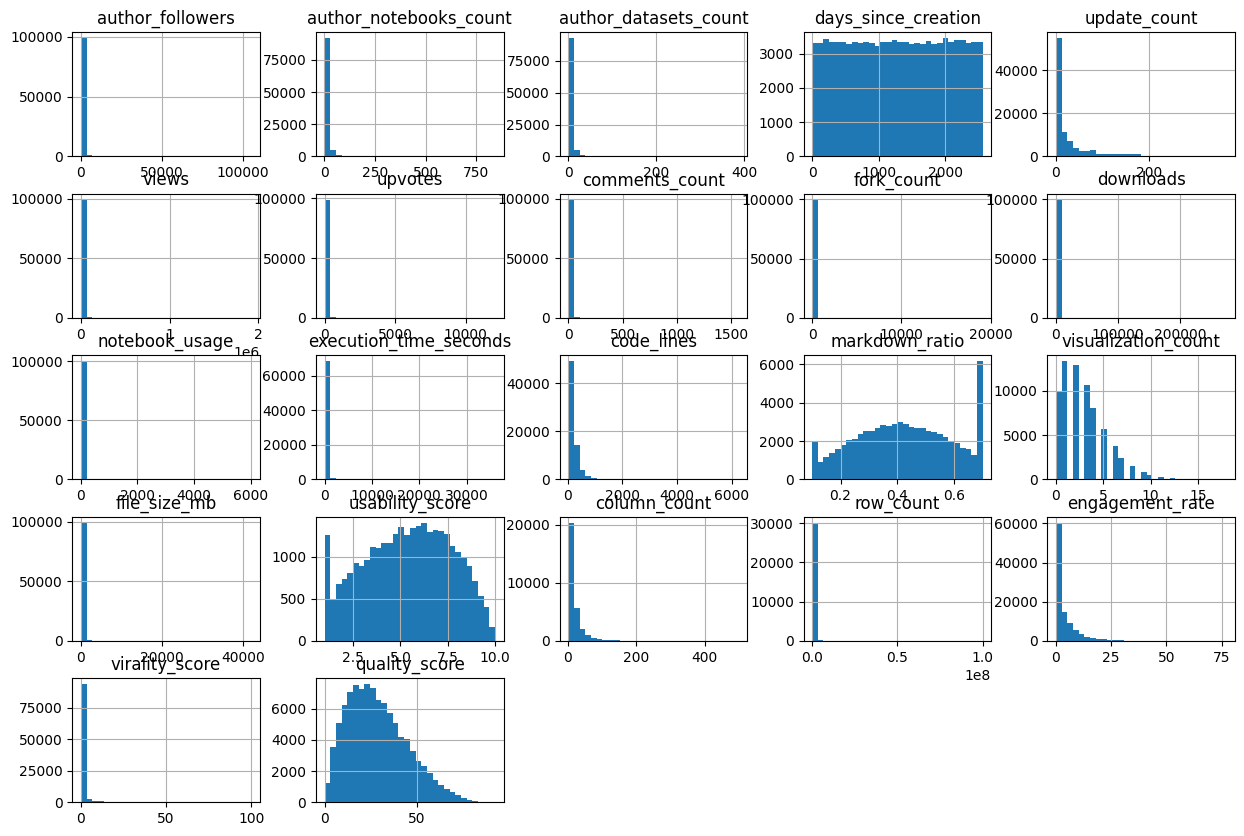

In [17]:
df.hist(figsize=(15, 10), bins=30)


## Views vs Upvotes

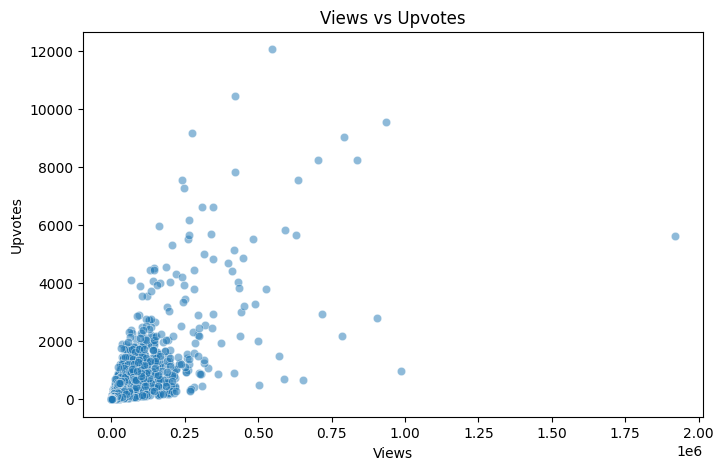

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="views",
    y="upvotes",
    alpha=0.5
)
plt.title("Views vs Upvotes")
plt.xlabel("Views")
plt.ylabel("Upvotes")
plt.show()


## Content Type Distribution

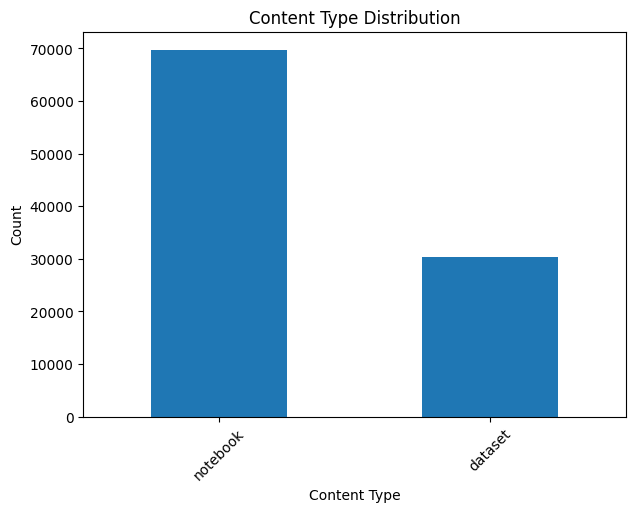

In [19]:
plt.figure(figsize=(7, 5))
df["content_type"].value_counts().plot(kind="bar")
plt.title("Content Type Distribution")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Author Tier vs Average Engagement Rate

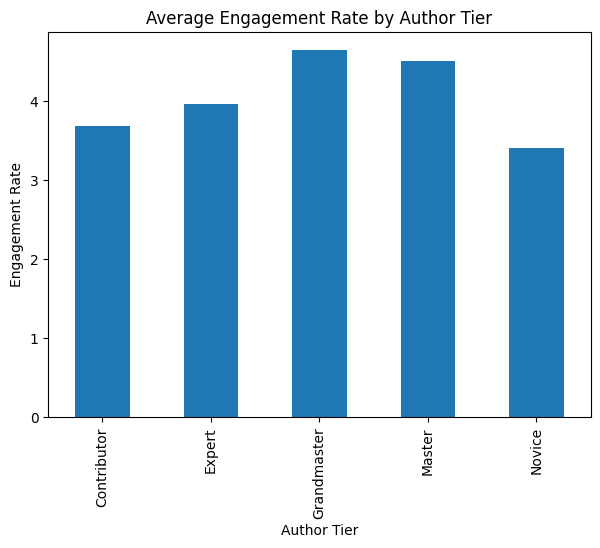

In [20]:
tier_engagement = df.groupby("author_tier")["engagement_rate"].mean()

plt.figure(figsize=(7, 5))
tier_engagement.plot(kind="bar")
plt.title("Average Engagement Rate by Author Tier")
plt.xlabel("Author Tier")
plt.ylabel("Engagement Rate")
plt.show()


## Medal Distribution

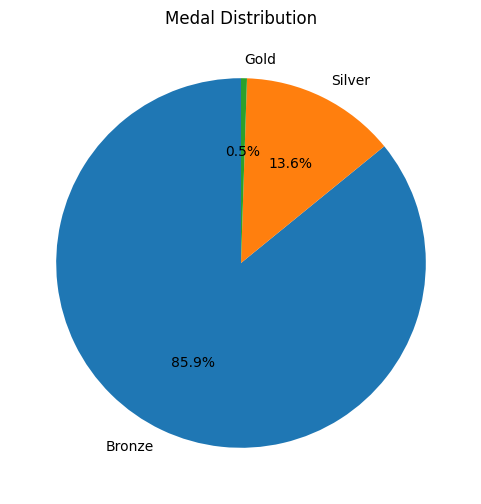

In [21]:
plt.figure(figsize=(6, 6))
df["medal"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Medal Distribution")
plt.ylabel("")
plt.show()


## Programming Language Usage

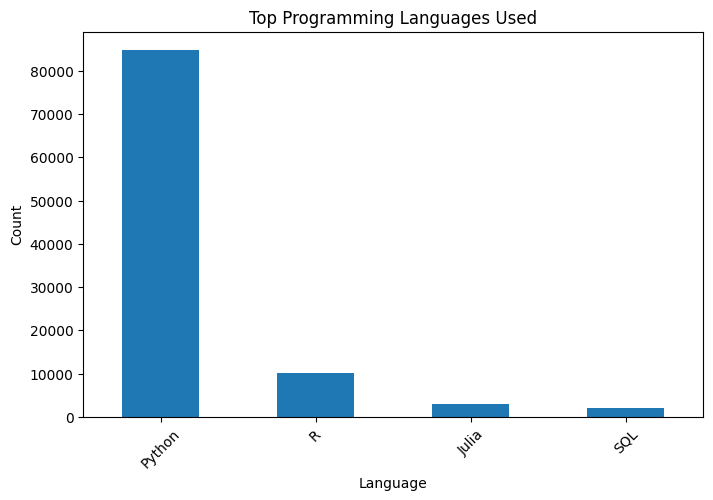

In [22]:
plt.figure(figsize=(8, 5))
df["programming_language"].value_counts().head(10).plot(kind="bar")
plt.title("Top Programming Languages Used")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Notebook Usage vs Virality Score

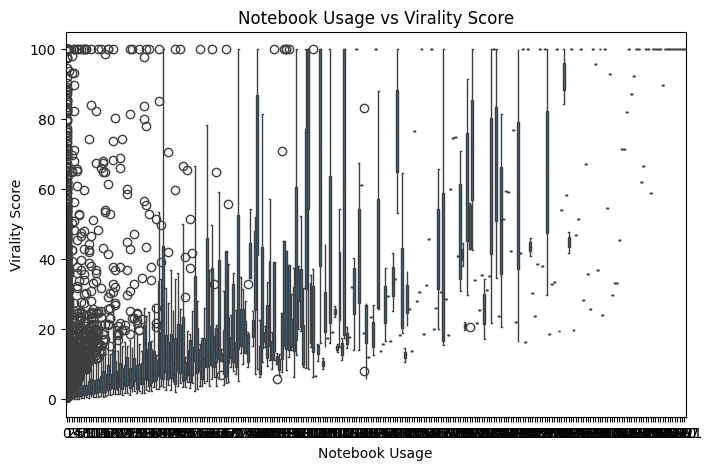

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="notebook_usage",
    y="virality_score"
)
plt.title("Notebook Usage vs Virality Score")
plt.xlabel("Notebook Usage")
plt.ylabel("Virality Score")
plt.show()


## Correlation Heatmap (Key Metrics)

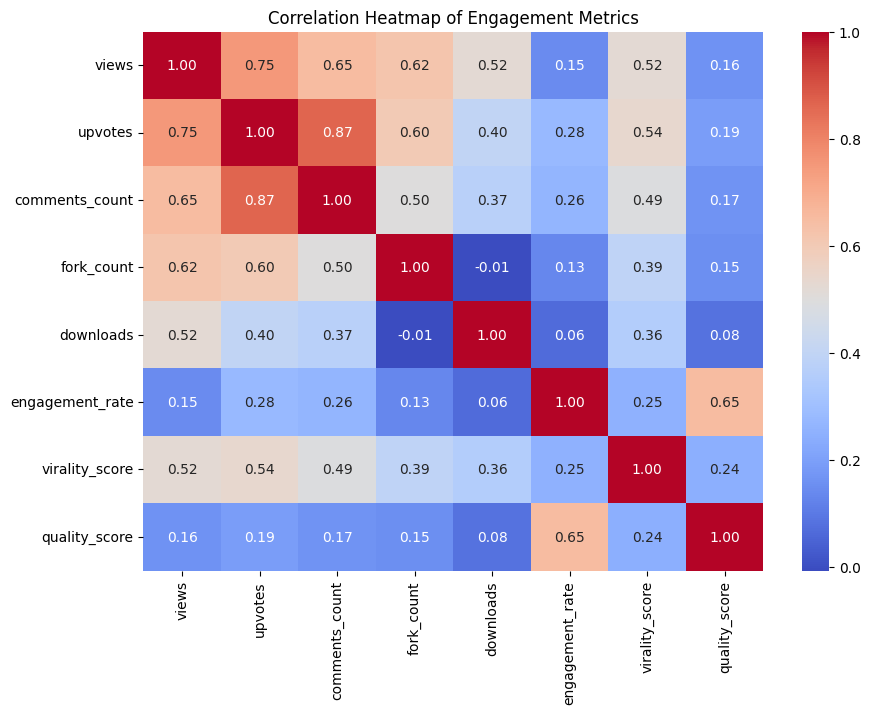

In [24]:
key_cols = [
    "views", "upvotes", "comments_count", "fork_count",
    "downloads", "engagement_rate", "virality_score", "quality_score"
]

corr = df[key_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Engagement Metrics")
plt.show()


## Execution Time vs Quality Score

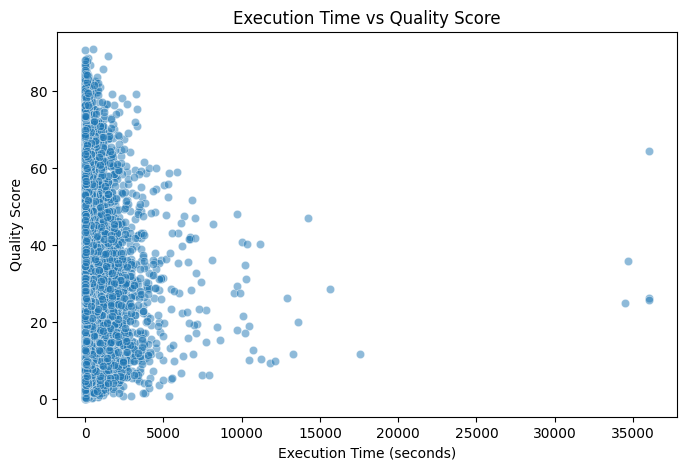

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="execution_time_seconds",
    y="quality_score",
    alpha=0.5
)
plt.title("Execution Time vs Quality Score")
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Quality Score")
plt.show()


## Uses GPU vs Average Quality Score

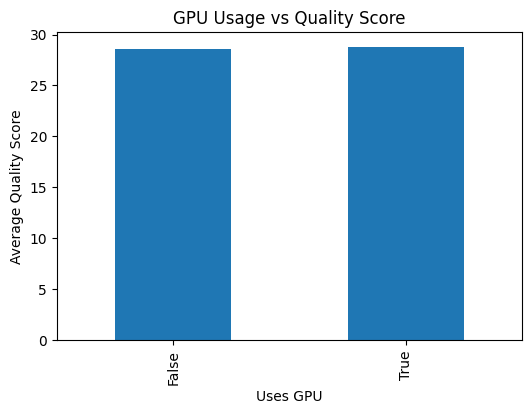

In [26]:
gpu_quality = df.groupby("uses_gpu")["quality_score"].mean()

plt.figure(figsize=(6, 4))
gpu_quality.plot(kind="bar")
plt.title("GPU Usage vs Quality Score")
plt.xlabel("Uses GPU")
plt.ylabel("Average Quality Score")
plt.show()


## File Size vs Downloads

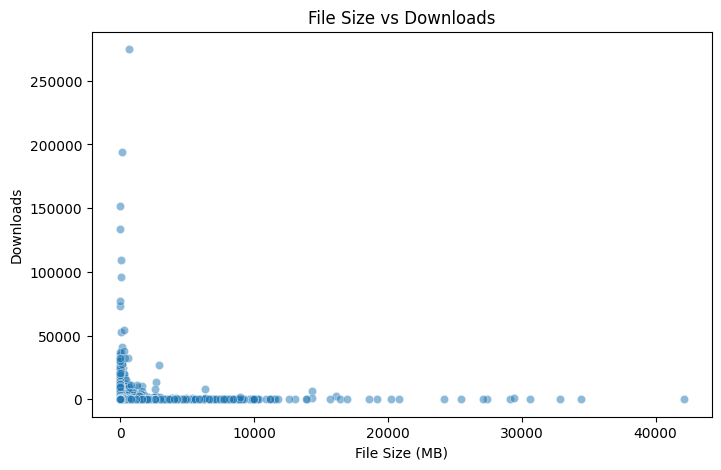

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="file_size_mb",
    y="downloads",
    alpha=0.5
)
plt.title("File Size vs Downloads")
plt.xlabel("File Size (MB)")
plt.ylabel("Downloads")
plt.show()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [29]:
drop_cols = [
    "content_id",
    "title",
    "author_username",
    "created_date",
    "last_updated",
    "all_topics",
    "libraries_used"
]

df_ml = df.drop(columns=drop_cols, errors="ignore")

In [30]:
for col in df_ml.columns:
    if df_ml[col].dtype in ["int64", "float64"]:
        df_ml[col].fillna(df_ml[col].median(), inplace=True)
    else:
        df_ml[col].fillna("Unknown", inplace=True)


In [31]:
label_encoders = {}

cat_cols = df_ml.select_dtypes(include="object").columns

for col in cat_cols:
    df_ml[col] = df_ml[col].astype(str)
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])
    label_encoders[col] = le


In [32]:
df_ml.select_dtypes(include="object").columns


Index([], dtype='object')

In [33]:
target = "is_trending"

X = df_ml.drop(columns=[target])
y = df_ml[target]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [35]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}


In [36]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    results.append([name, round(accuracy, 2)])


In [37]:
accuracy_df = (
    pd.DataFrame(results, columns=["Model", "Accuracy (%)"])
    .sort_values(by="Accuracy (%)", ascending=False)
)

accuracy_df


,Model,Accuracy (%)
3,Decision Tree,100.00
0,Logistic Regression,99.98
1,Random Forest,99.98
2,Support Vector Machine,99.98
4,Naive Bayes,98.24


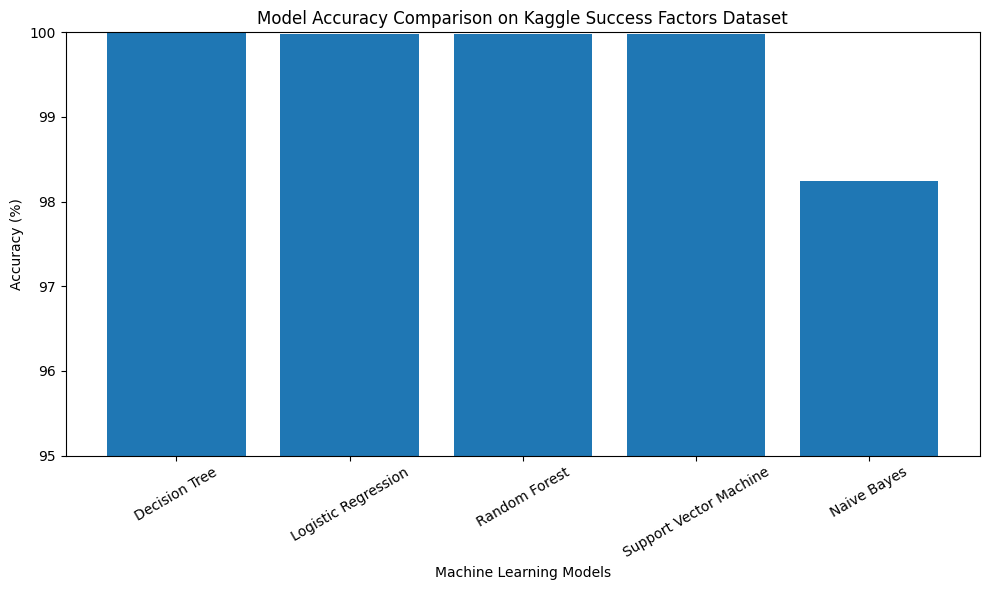

In [38]:
plt.figure(figsize=(10, 6))

plt.bar(
    accuracy_df["Model"],
    accuracy_df["Accuracy (%)"]
)

plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison on Kaggle Success Factors Dataset")

plt.xticks(rotation=30)
plt.ylim(95, 100)   # zoom-in since accuracies are very high

plt.tight_layout()
plt.show()

## Thank you..pls upvote!!!!